In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Resources/DB_mockup.csv')

In [10]:
df['GenHlth'].count()

99

<AxesSubplot:xlabel='GenHlth'>

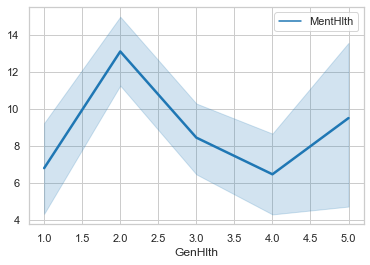

In [8]:
sns.set_theme(style='whitegrid')

line = df['GenHlth']

values = df['MentHlth']

data = pd.DataFrame(values, line)

data= data.rolling(7).mean()

# Create Seaborn Line plot to determine basic levels of correlation between Mental health and General Health

sns.lineplot(data=data, palette='tab10', linewidth=2.5)

In [47]:
clean_df = pd.read_csv('Resources/2015_clean.csv')

In [48]:
clean_df.sample(10)

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
124917,20,2.0,2.0,88,88.0,1,2,9.0,9,99.0,NaN,NaN,NaN,NaN
375395,49,3.0,88.0,88,NaN,1,1,1.0,7,88.0,6.0,1.0,205.0,508.0
168480,24,1.0,88.0,88,NaN,1,2,2.0,7,88.0,3.0,1.0,160.0,502.0
110828,19,5.0,30.0,88,4.0,1,2,2.0,7,88.0,5.0,1.0,200.0,505.0
73928,12,4.0,30.0,88,88.0,1,2,2.0,7,88.0,8.0,1.0,125.0,502.0
85786,15,2.0,30.0,88,88.0,1,2,2.0,7,88.0,99.0,1.0,145.0,508.0
429062,56,2.0,6.0,88,4.0,1,1,2.0,2,88.0,8.0,1.0,210.0,600.0
331829,44,3.0,77.0,77,77.0,1,2,2.0,8,88.0,6.0,2.0,131.0,505.0
439568,72,4.0,30.0,88,30.0,1,2,2.0,5,88.0,1.0,2.0,9999.0,502.0
275371,36,2.0,5.0,10,5.0,1,2,2.0,1,99.0,NaN,NaN,NaN,NaN


In [69]:
# Making readable values for presentation purposes

# clean_df = clean_df.dropna()

# clean_df['SEX'].replace([1,2],['M','F'], inplace=True)

clean_df['CHILDREN'].replace([88.0, 99.0], [0, 0], inplace=True)

clean_df.sample(10)

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
56186,9,3.0,88.0,5,3.0,1,F,2.0,7,0.0,6.0,1.0,136.0,504.0
365781,48,3.0,10.0,88,7.0,1,F,2.0,7,0.0,5.0,1.0,130.0,506.0
224201,30,3.0,7.0,7,7.0,1,F,2.0,6,0.0,5.0,1.0,130.0,505.0
71528,12,2.0,88.0,8,5.0,1,F,2.0,7,0.0,99.0,1.0,9999.0,505.0
94191,16,1.0,2.0,88,88.0,1,M,1.0,2,0.0,7.0,1.0,168.0,510.0
434482,66,2.0,30.0,88,88.0,1,M,2.0,7,0.0,2.0,2.0,170.0,506.0
97058,16,3.0,30.0,88,15.0,1,F,2.0,1,0.0,6.0,1.0,9999.0,508.0
322495,41,1.0,88.0,3,88.0,1,M,2.0,2,1.0,6.0,1.0,200.0,603.0
303215,39,2.0,21.0,88,88.0,1,M,1.0,1,3.0,8.0,1.0,215.0,602.0
431440,56,4.0,30.0,99,20.0,1,F,2.0,8,1.0,99.0,2.0,9999.0,507.0


<AxesSubplot:xlabel='PHYSHLTH'>

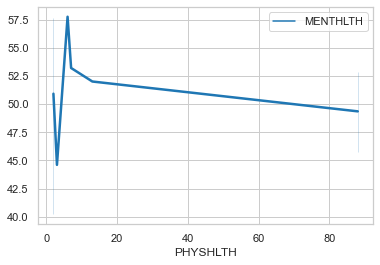

In [74]:
sns.set_theme(style='whitegrid')

line = clean_df['PHYSHLTH']

values = clean_df['MENTHLTH']

data = pd.DataFrame(values, line)

data = data.rolling(20).mean()

# Create Seaborn Line plot to determine basic levels of correlation between Mental health and General Health

sns.lineplot(data=data, palette='tab10', linewidth=2.5)

<AxesSubplot:xlabel='MENTHLTH', ylabel='PHYSHLTH'>

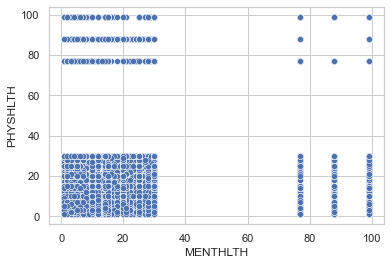

In [76]:
sns.scatterplot(data=clean_df, x='MENTHLTH', y='PHYSHLTH')

<AxesSubplot:>

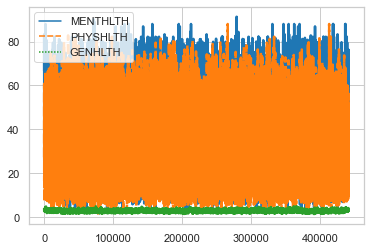

In [79]:
values = clean_df

data = pd.DataFrame(values, columns=['MENTHLTH','PHYSHLTH','GENHLTH'])

data = data.rolling(10).mean()

sns.lineplot(data=data, palette='tab10', linewidth=2.5)